# Q1: Company_Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [4]:
company = pd.read_csv('Company_Data.csv')

In [40]:
company.shape

(400, 11)

In [41]:
company.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [42]:
company.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [43]:
# Categorising Sales into High and Low
company["SalesCategory"] = np.where(company["Sales"] > 10.00, "High", "Low")

In [44]:
company.head(2)

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   

   Education Urban   US SalesCategory  
0         17   Yes  Yes           Low  
1         10   Yes  Yes          High

In [45]:
# Data Preprocessing - Converting categorical data to numeric data using Label Encoding
from sklearn import preprocessing
Label_Encoder = preprocessing.LabelEncoder()
company['ShelveLoc'] = Label_Encoder.fit_transform(company['ShelveLoc'])
company['Urban'] = Label_Encoder.fit_transform(company['Urban'])
company['US'] = Label_Encoder.fit_transform(company['US'])
company['SalesCategory'] = Label_Encoder.fit_transform(company['SalesCategory'])

In [46]:
company.head(2)

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          0   42   
1  11.22        111      48           16         260     83          1   65   

   Education  Urban  US  SalesCategory  
0         17      1   1              1  
1         10      1   1              0

In [47]:
company.corr()

Sales  CompPrice    Income  Advertising  Population  \
Sales          1.000000   0.064079  0.151951     0.269507    0.050471   
CompPrice      0.064079   1.000000 -0.080653    -0.024199   -0.094707   
Income         0.151951  -0.080653  1.000000     0.058995   -0.007877   
Advertising    0.269507  -0.024199  0.058995     1.000000    0.265652   
Population     0.050471  -0.094707 -0.007877     0.265652    1.000000   
Price         -0.444951   0.584848 -0.056698     0.044537   -0.012144   
ShelveLoc      0.157470   0.023350 -0.067678     0.008544   -0.044772   
Age           -0.231815  -0.100239 -0.004670    -0.004557   -0.042663   
Education     -0.051955   0.025197 -0.056855    -0.033594   -0.106378   
Urban         -0.015419   0.066594  0.037967     0.042035   -0.052025   
US             0.177093   0.016869  0.089601     0.684460    0.060564   
SalesCategory -0.728080  -0.016459 -0.139223    -0.221796   -0.046490   

                  Price  ShelveLoc       Age  Education     Urban        US  \
Sales         -0.444951   0.157470 -0.231815  -0.051955 -0.015419  0.177093   
CompPrice      0.584848   0.023350 -0.100239   0.025197  0.066594  0.016869   
Income        -0.056698  -0.067678 -0.004670  -0.056855  0.037967  0.089601   
Advertising    0.044537   0.008544 -0.004557  -0.033594  0.042035  0.684460   
Population    -0.012144  -0.044772 -0.042663  -0.106378 -0.052025  0.060564   
Price          1.000000   0.014633 -0.102177   0.011747  0.047016  0.057861   
ShelveLoc      0.014633   1.000000  0.056488   0.001492 -0.063978 -0.039760   
Age           -0.102177   0.056488  1.000000   0.006488  0.028479  0.008652   
Education      0.011747   0.001492  0.006488   1.000000 -0.033094 -0.078250   
Urban          0.047016  -0.063978  0.028479  -0.033094  1.000000  0.047085   
US             0.057861  -0.039760  0.008652  -0.078250  0.047085  1.000000   
SalesCategory  0.327680  -0.000114  0.182572   0.043878 -0.013975 -0.180524   

               SalesCategory  
Sales              -0.728080  
CompPrice          -0.016459  
Income             -0.139223  
Advertising        -0.221796  
Population         -0.046490  
Price               0.327680  
ShelveLoc          -0.000114  
Age                 0.182572  
Education           0.043878  
Urban              -0.013975  
US                 -0.180524  
SalesCategory       1.000000

In [48]:
company["SalesCategory"].value_counts()

SalesCategory
1    322
0     78
Name: count, dtype: int64

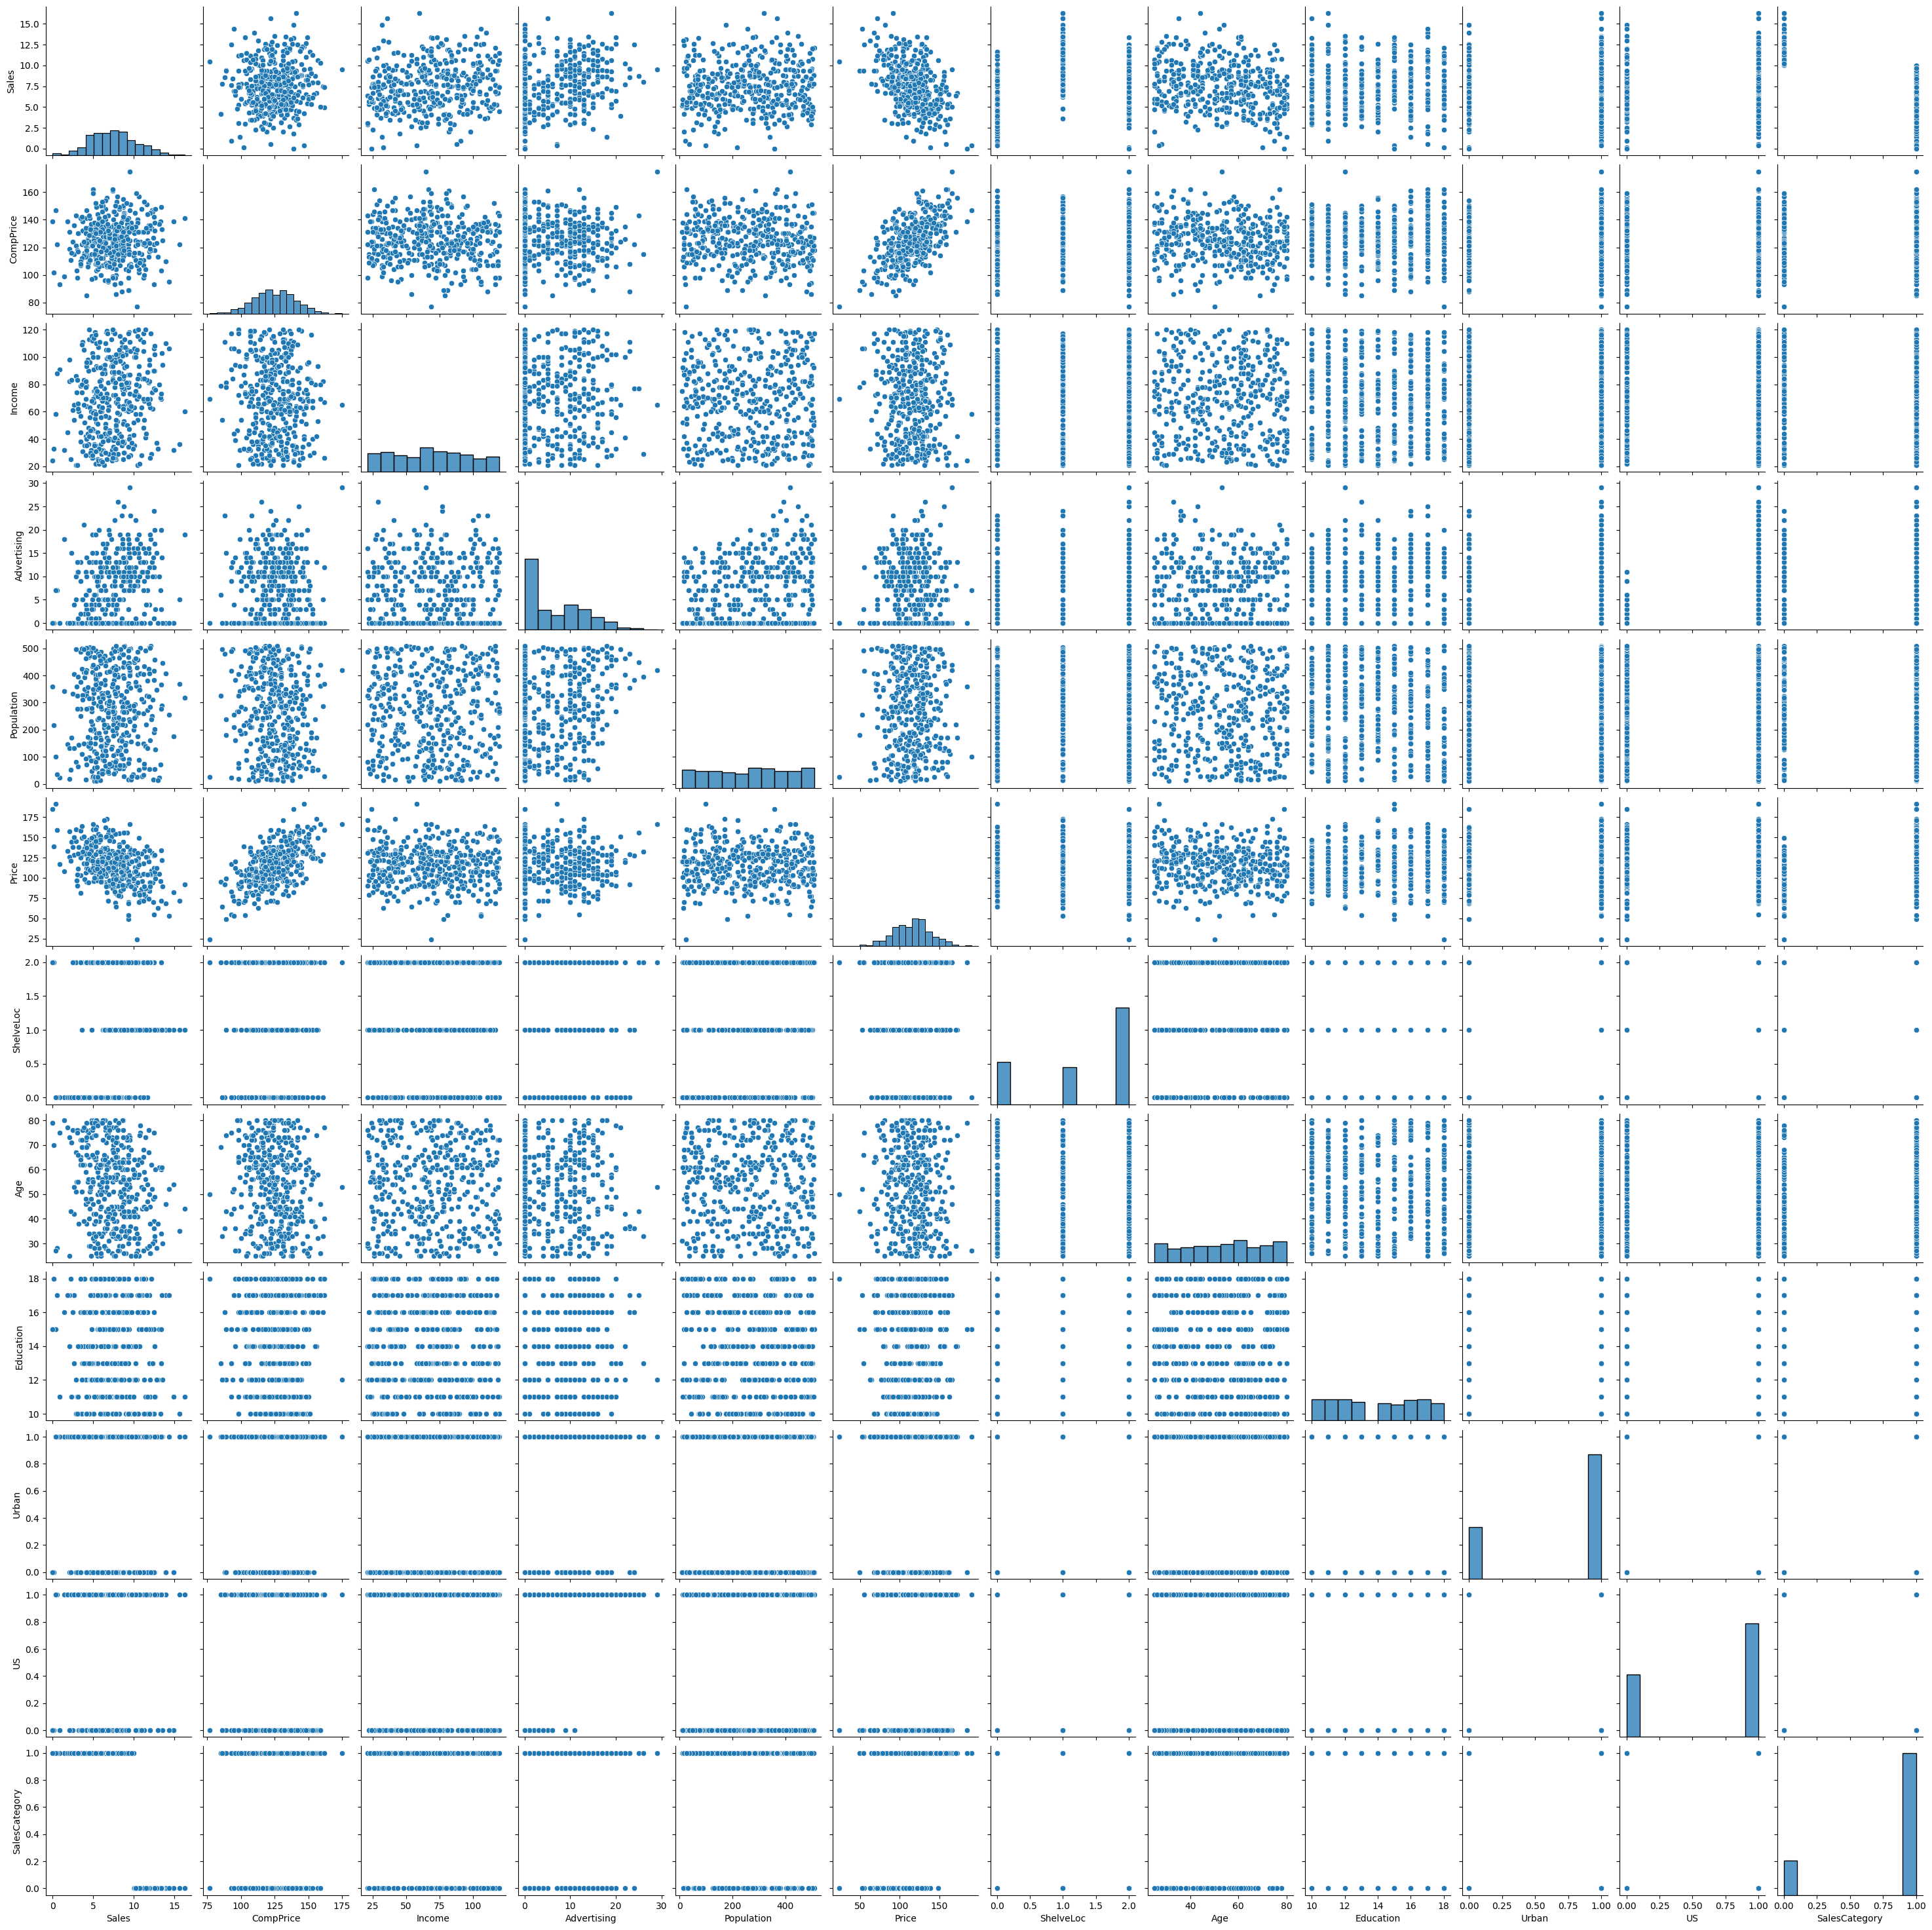

In [49]:
# visualization
import seaborn as sns
sns.pairplot(company)

In [50]:
x = company.iloc[:,1:11]
x.sample()

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
395        138     108           17         203    128          1   33   

     Education  Urban  US  
395         14      1   1

In [51]:
y = company.iloc[:,-1]
y

0      1
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    1
Name: SalesCategory, Length: 400, dtype: int64

In [52]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 40)

In [53]:
x_train.shape

(320, 10)

In [54]:
x_test.shape

(80, 10)

# Building decision tree using entropy criteria (C5.0)

In [55]:
# Building decision tree using entropy criteria (C5.0)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

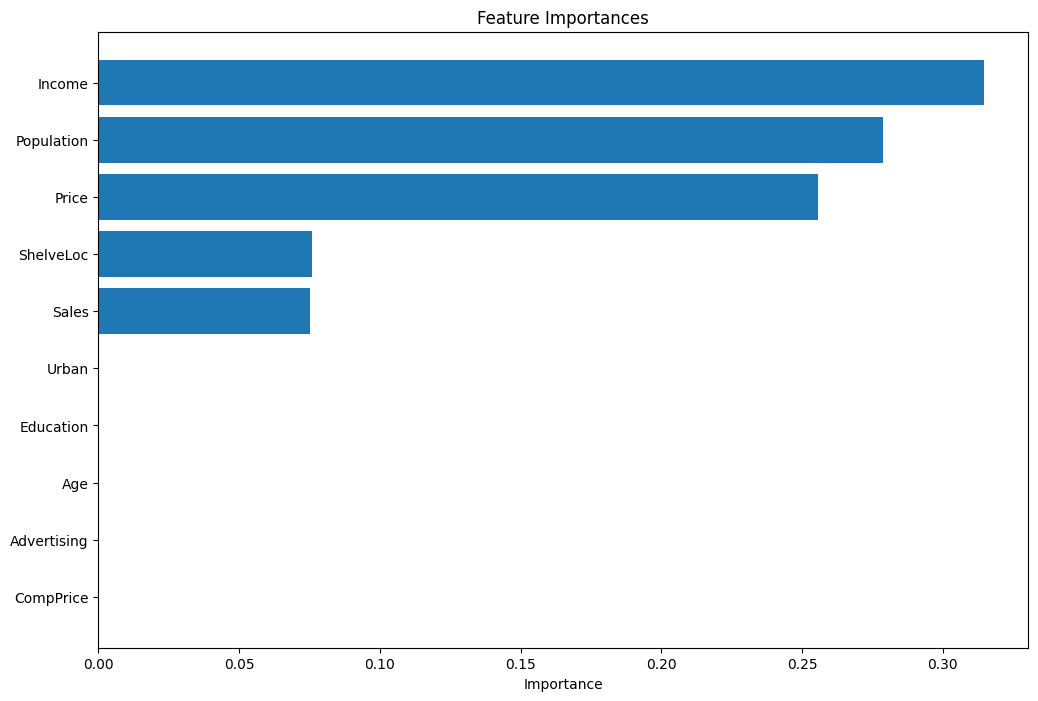

In [60]:
# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.barh(range(x.shape[1]), importances[indices], align='center')
plt.yticks(range(x.shape[1]), np.array(['Sales', 'CompPrice', 'Income', 'Advertising',
                                        'Population', 'Price', 'ShelveLoc', 'Age',
                                        'Education', 'Urban', 'US'])[indices])
plt.xlabel('Importance')
plt.show()

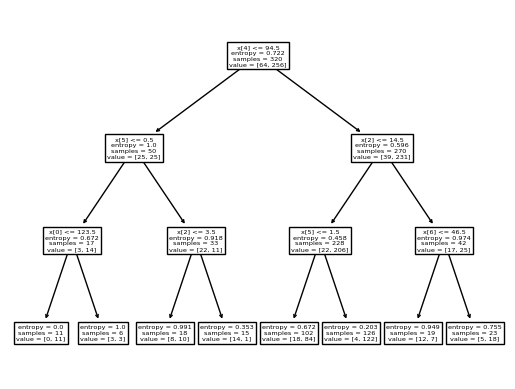

In [ ]:
# To plot decision tree
from sklearn import tree
tree.plot_tree(model);

In [ ]:
dict(zip(Label_Encoder.classes_, range(len(Label_Encoder.classes_))))

{'High': 0, 'Low': 1}

In [ ]:
company["SalesCategory"].value_counts()

SalesCategory
1    322
0     78
Name: count, dtype: int64

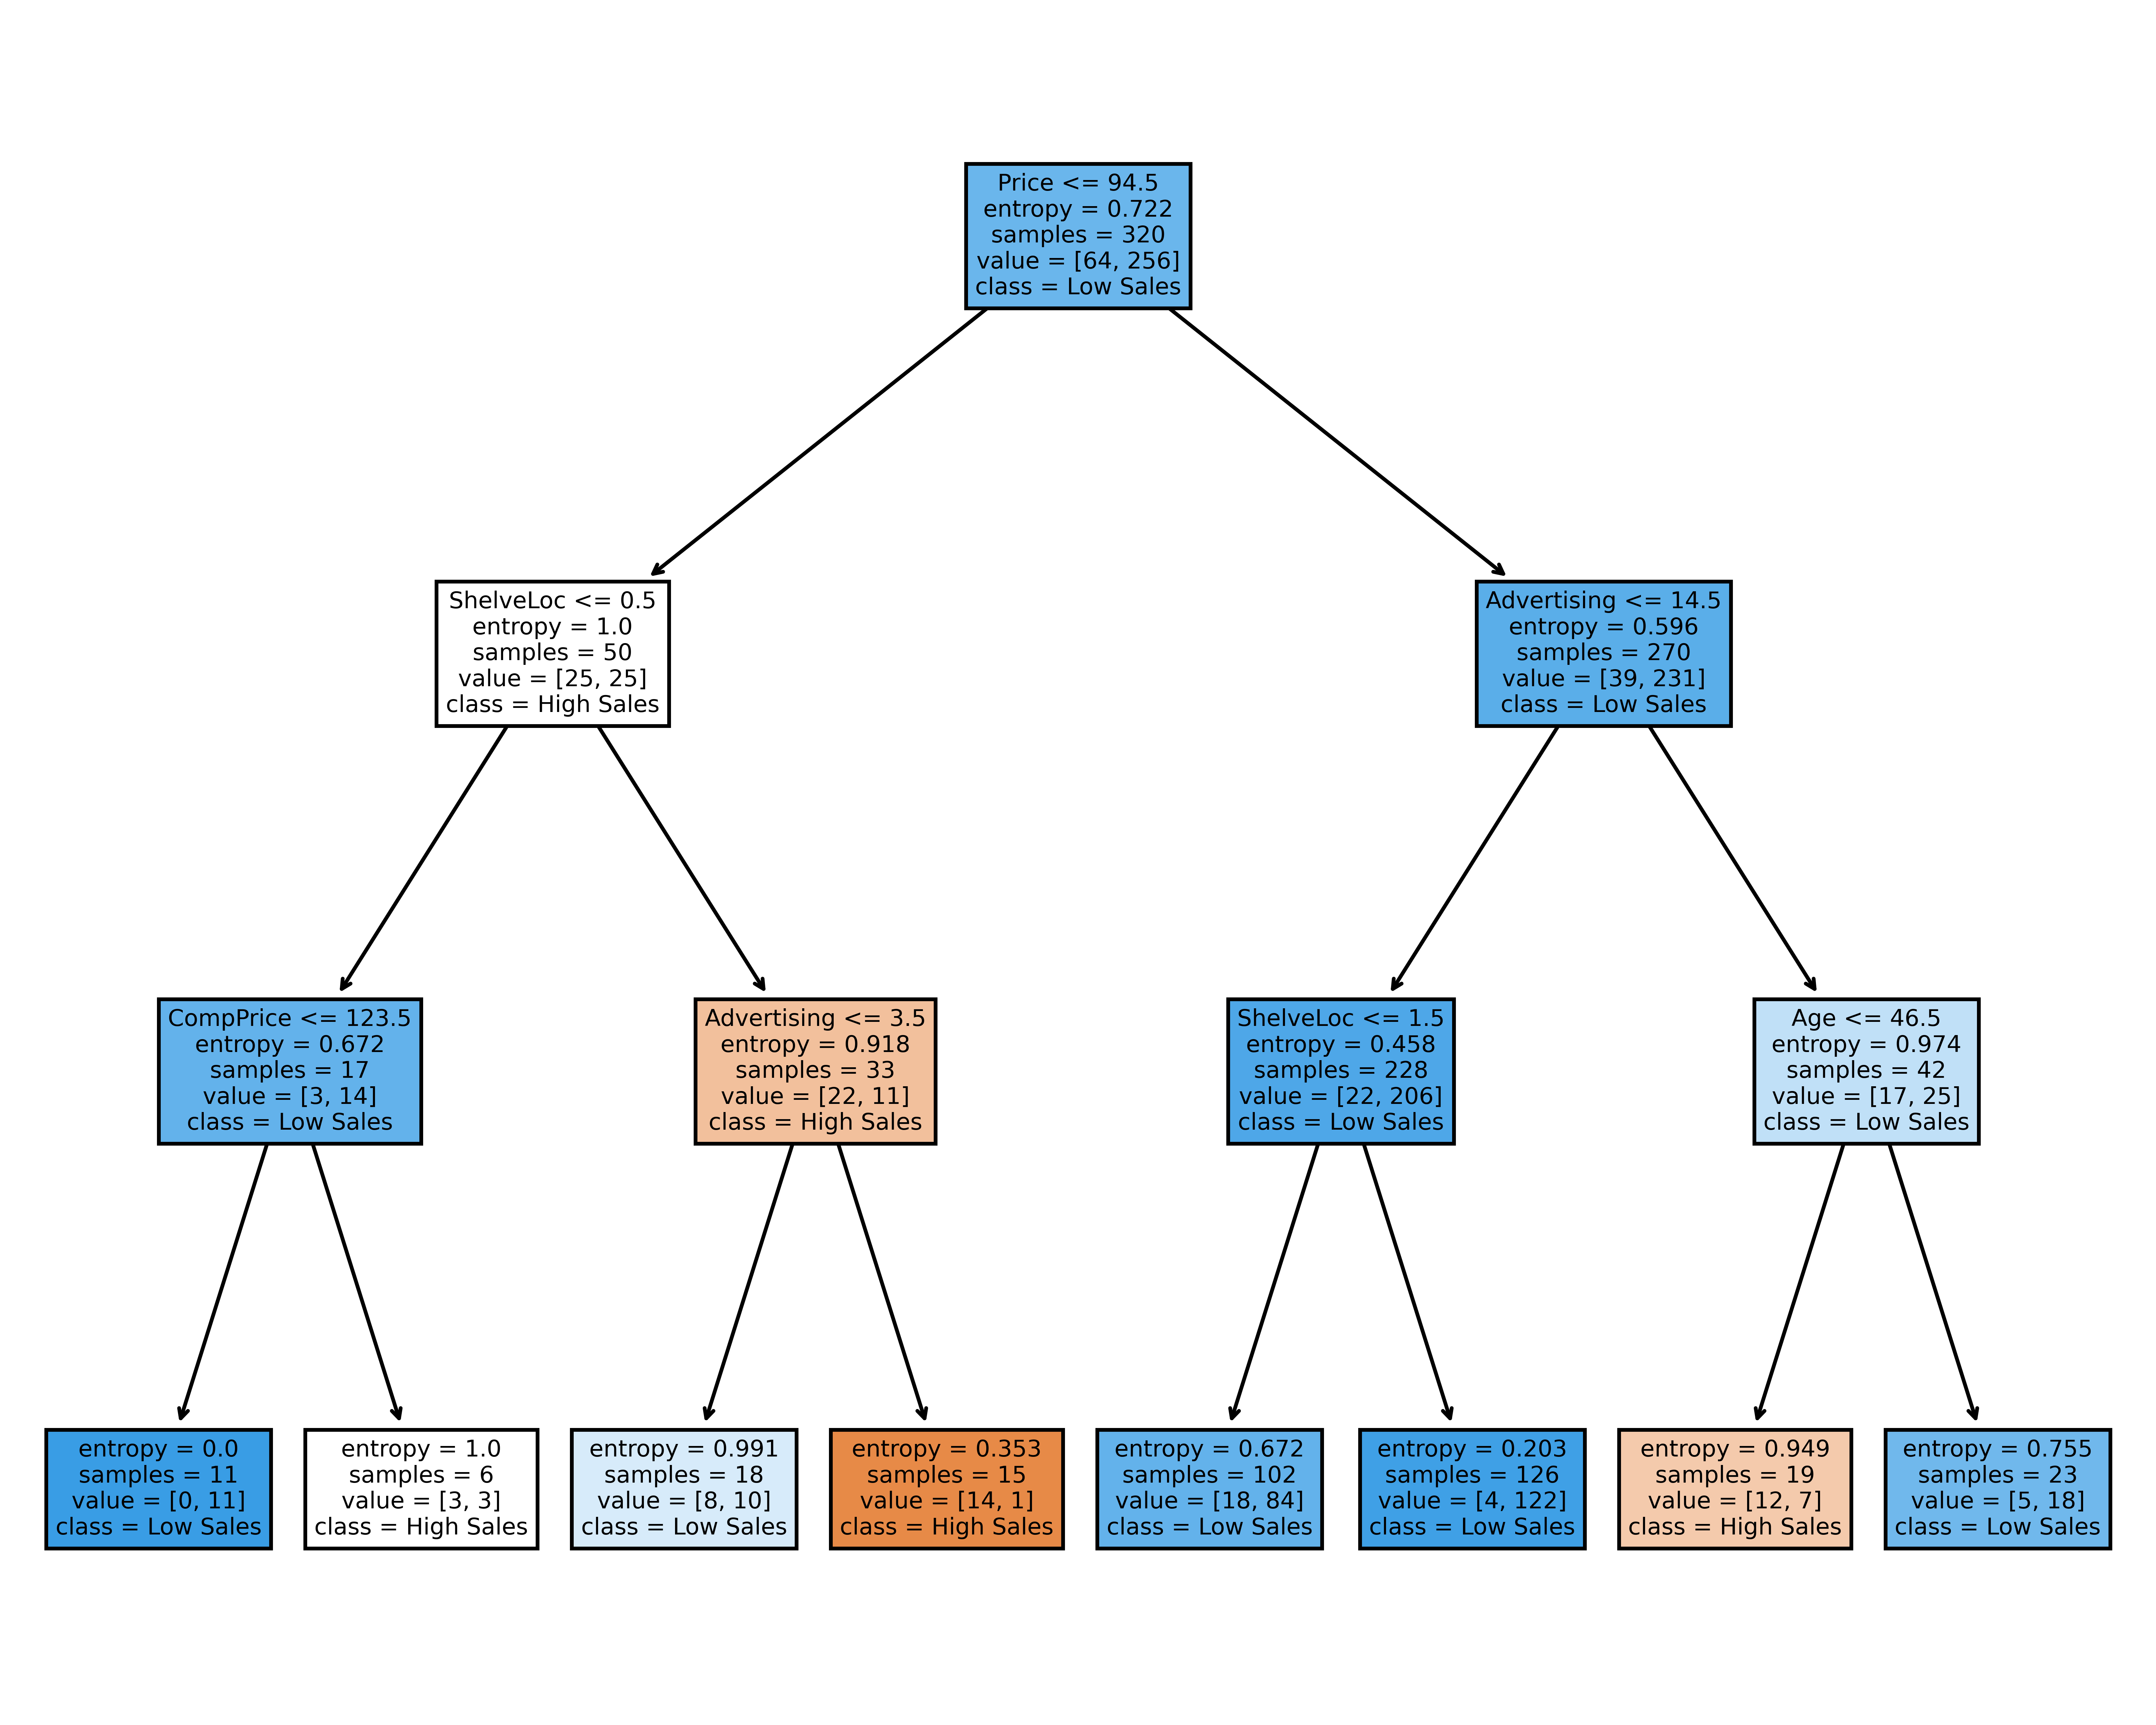

In [ ]:
# Detailed tree view
from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['High Sales', 'Low Sales']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=800)
tree.plot_tree(model,feature_names = fn, class_names=cn,filled = True);

In [ ]:
company.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'SalesCategory'],
      dtype='object')

In [ ]:
# Predicting on test data
y_pred = model.predict(x_test)
pd.Series(y_pred).value_counts()

1    70
0    10
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

SalesCategory
1    66
0    14
Name: count, dtype: int64

In [ ]:
# 2 way table to understand model accuracy
pd.crosstab(y_test, y_pred)

col_0          0   1
SalesCategory       
0              4  10
1              6  60

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8

In [ ]:
np.mean(y_pred == y_test)

0.8

# Building decision tree using gini index (CART)

In [ ]:
# Building decision tree using gini index (CART)
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

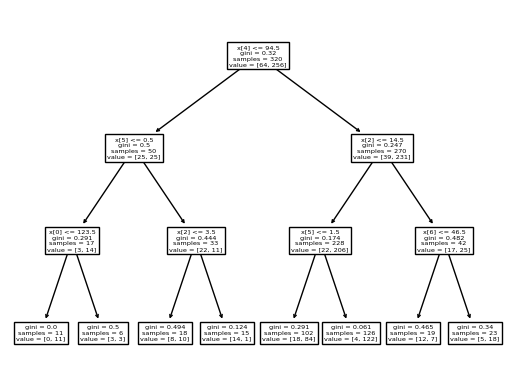

In [ ]:
# To plot decision tree
from sklearn import tree
tree.plot_tree(model_gini);

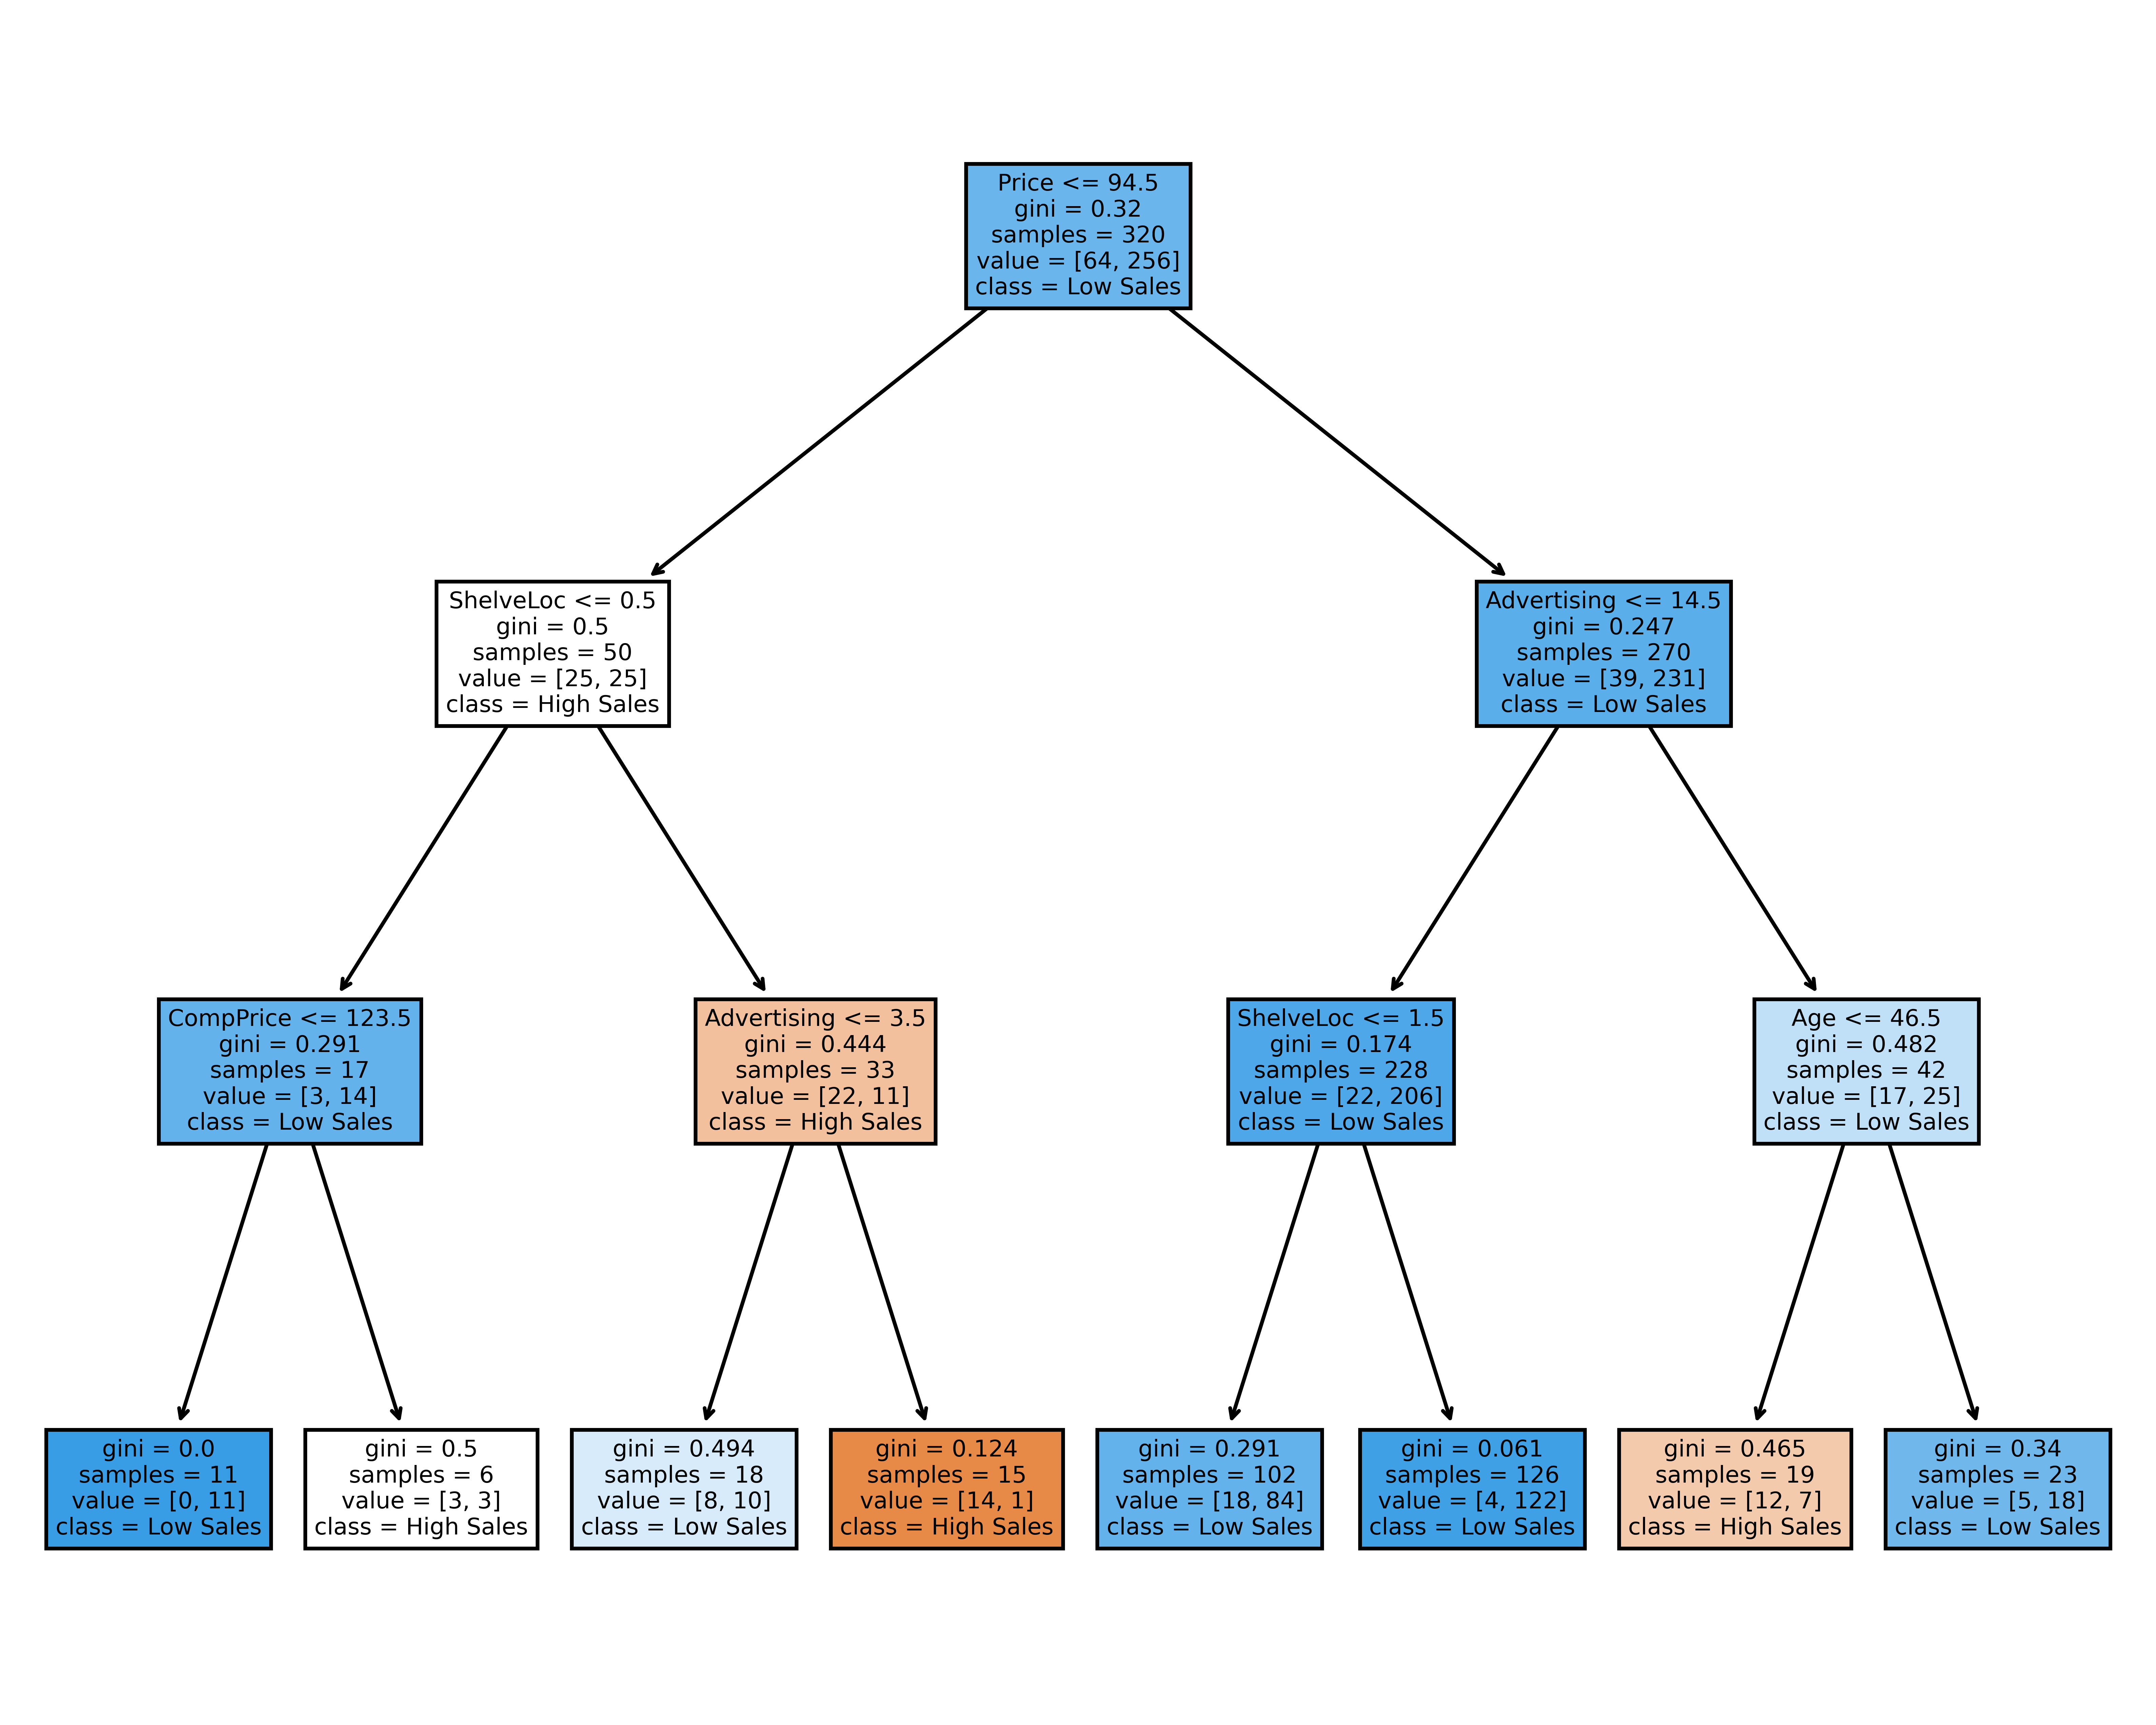

In [ ]:
# Detailed tree view
from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['High Sales', 'Low Sales']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=800)
tree.plot_tree(model_gini,feature_names = fn, class_names=cn,filled = True);

In [ ]:
# Predicting on test data
y_pred_gini = model_gini.predict(x_test)
pd.Series(y_pred_gini).value_counts()

1    70
0    10
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

SalesCategory
1    66
0    14
Name: count, dtype: int64

In [ ]:
# Accuracy
accuracy_score(y_test, y_pred_gini)

0.8

In [ ]:
np.mean(y_pred_gini == y_test)

0.8

# Q2: Fraud_Check

In [5]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [7]:
FraudCheckData = pd.read_csv('Fraud_check.csv')

In [19]:
FraudCheckData.shape

(600, 6)

In [20]:
FraudCheckData.describe()

Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

In [21]:
FraudCheckData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [22]:
FraudCheckData.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [23]:
FraudCheckData['TaxableIncomeCategory'] = np.where(FraudCheckData['Taxable.Income'] > 30000, "Good", "Risky")

In [24]:
FraudCheckData.sample()

Undergrad Marital.Status  Taxable.Income  City.Population  \
245        NO         Single           33810           183221   

     Work.Experience Urban TaxableIncomeCategory  
245               24    NO                  Good

In [25]:
# dropping unnecessary columns
FraudCheckData.drop(['Taxable.Income'], axis = 1, inplace = True)
FraudCheckData.drop(['City.Population'], axis = 1, inplace = True)
FraudCheckData.sample()

Undergrad Marital.Status  Work.Experience Urban TaxableIncomeCategory
50       YES         Single                3   YES                  Good

In [26]:
# Label Encoding
from sklearn import preprocessing
LabelEncoder = preprocessing.LabelEncoder()
FraudCheckData['Undergrad'] = LabelEncoder.fit_transform(FraudCheckData['Undergrad'])
FraudCheckData['Marital.Status'] = LabelEncoder.fit_transform(FraudCheckData['Marital.Status'])
FraudCheckData['Urban'] = LabelEncoder.fit_transform(FraudCheckData['Urban'])
FraudCheckData['TaxableIncomeCategory'] = LabelEncoder.fit_transform(FraudCheckData['TaxableIncomeCategory'])

In [27]:
FraudCheckData.sample()

Undergrad  Marital.Status  Work.Experience  Urban  TaxableIncomeCategory
164          1               2               28      0                      0

In [28]:
FraudCheckData.corr()

Undergrad  Marital.Status  Work.Experience     Urban  \
Undergrad               1.000000        0.042407        -0.005362 -0.000267   
Marital.Status          0.042407        1.000000        -0.002213  0.064562   
Work.Experience        -0.005362       -0.002213         1.000000 -0.094559   
Urban                  -0.000267        0.064562        -0.094559  1.000000   
TaxableIncomeCategory   0.012523        0.006081        -0.001972  0.004830   

                       TaxableIncomeCategory  
Undergrad                           0.012523  
Marital.Status                      0.006081  
Work.Experience                    -0.001972  
Urban                               0.004830  
TaxableIncomeCategory               1.000000

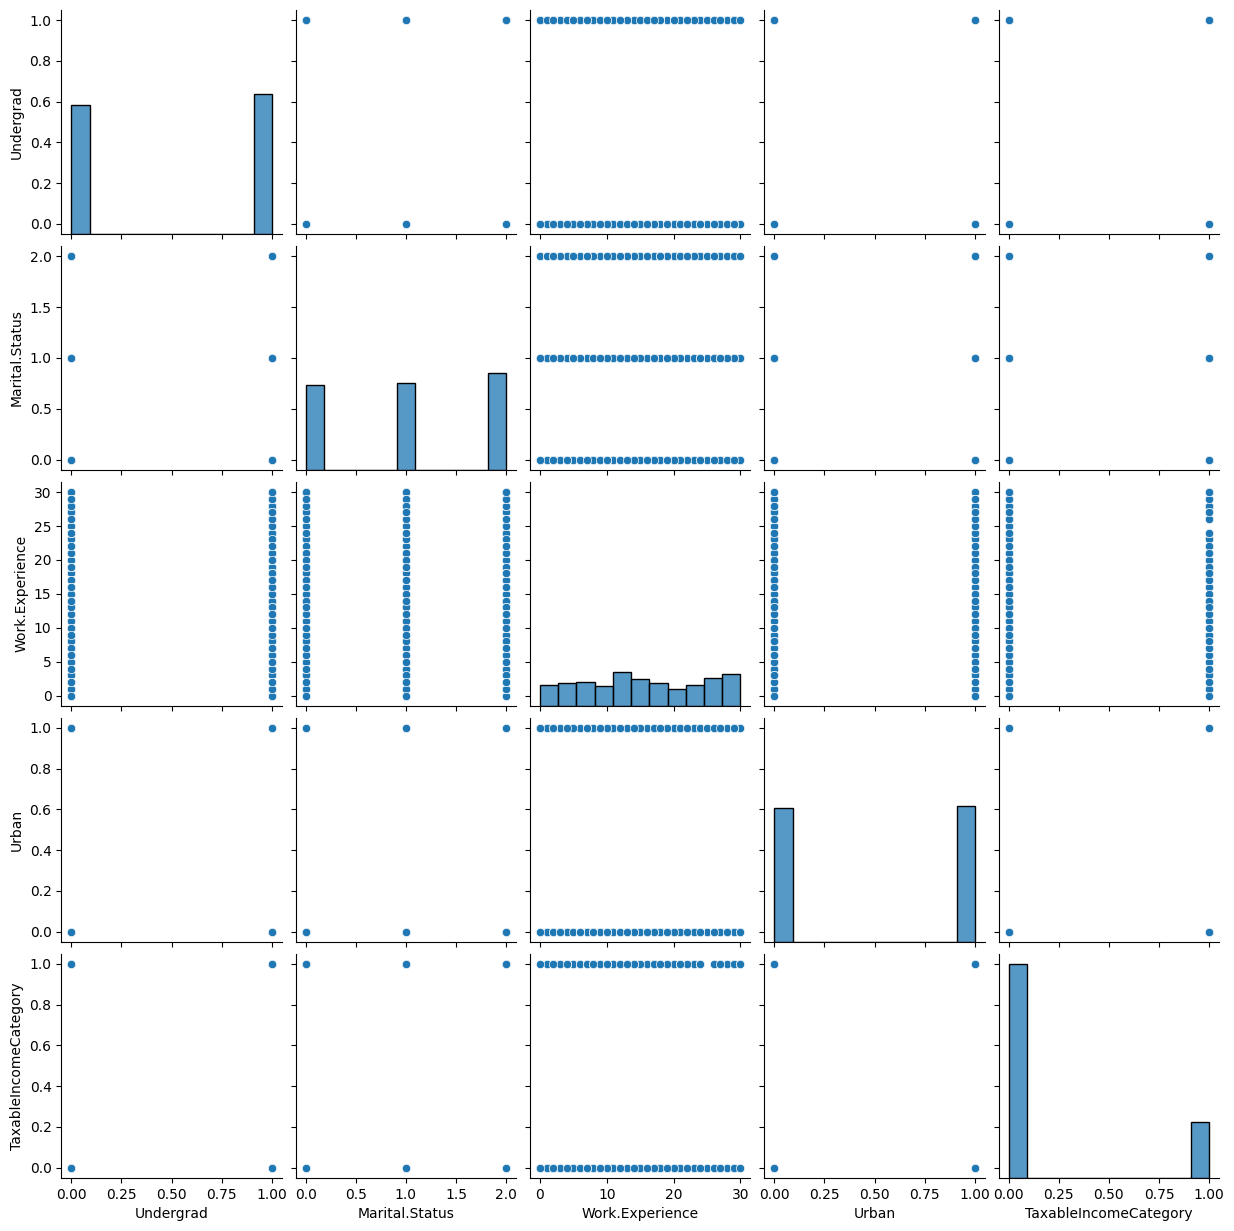

In [29]:
# visualization
import seaborn as sns
sns.pairplot(FraudCheckData)

In [30]:
x = FraudCheckData.iloc[:,0:4]
x

Undergrad  Marital.Status  Work.Experience  Urban
0            0               2               10      1
1            1               0               18      1
2            0               1               30      1
3            1               2               15      1
4            0               1               28      0
..         ...             ...              ...    ...
595          1               0                7      1
596          1               0                2      1
597          0               0                0      1
598          1               1               17      0
599          0               0               16      0

[600 rows x 4 columns]

In [31]:
y = FraudCheckData.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: TaxableIncomeCategory, Length: 600, dtype: int64

In [32]:
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 40)

In [33]:
x_train.shape

(480, 4)

In [34]:
x_test.shape

(120, 4)

In [35]:
# Model building using entropy
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

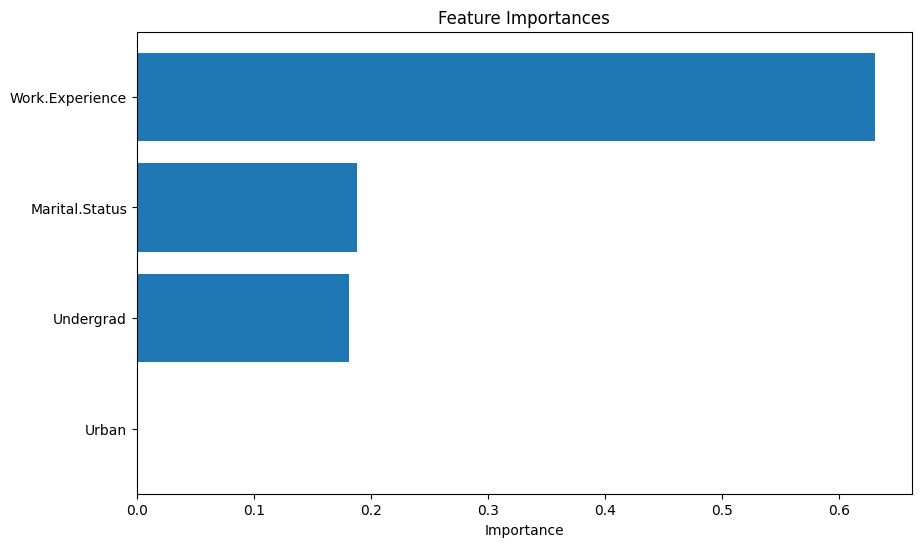

In [39]:
# visualization
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(x.shape[1]), importances[indices], align='center')
plt.yticks(range(x.shape[1]), np.array(['Undergrad', 'Marital.Status', 'Work.Experience', 'Urban'])[indices])
plt.xlabel('Importance')
plt.show()

In [ ]:
FraudCheckData.columns

Index(['Undergrad', 'Marital.Status', 'Work.Experience', 'Urban',
       'TaxableIncomeCategory'],
      dtype='object')

In [ ]:
dict(zip(LabelEncoder.classes_, range(len(LabelEncoder.classes_))))

{'Good': 0, 'Risky': 1}

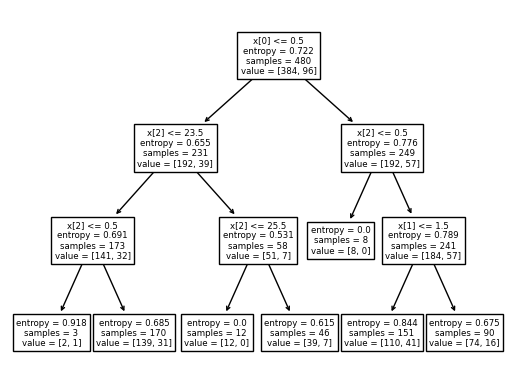

In [ ]:
import sklearn.tree as tree
tree.plot_tree(model);

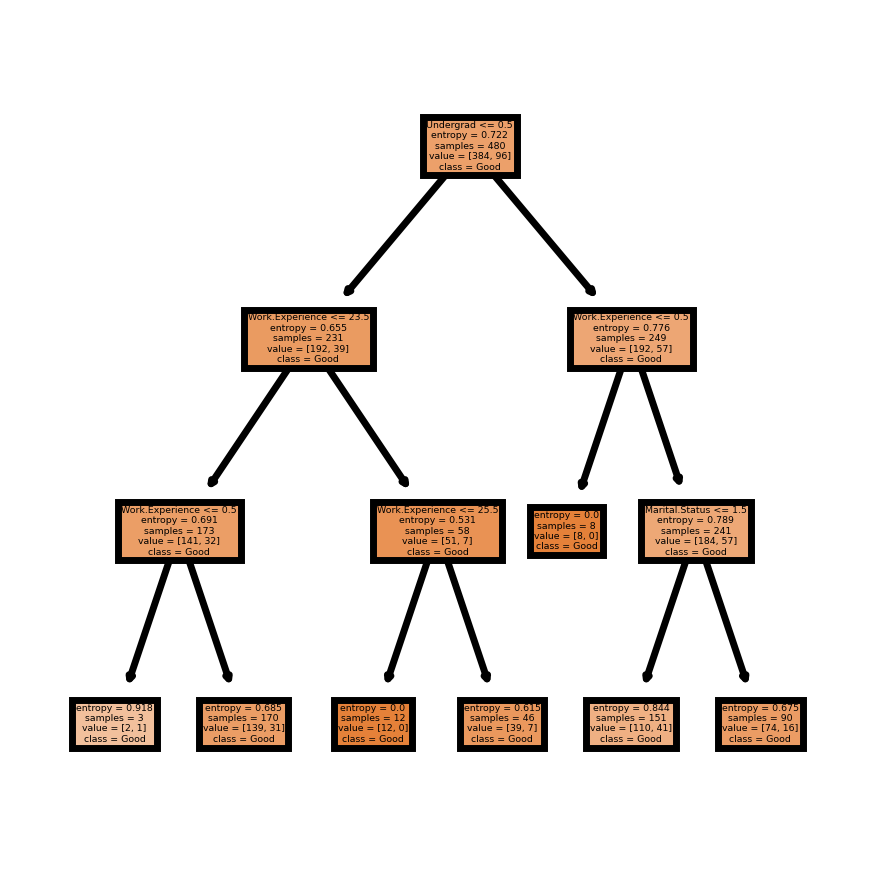

In [ ]:
# Decision tree
import matplotlib.pyplot as plt
import sklearn.tree as tree
fn=['Undergrad', 'Marital.Status', 'Work.Experience', 'Urban'] #.columns
cn=['Good', 'Risky']    #.value_count.keys
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=500)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [ ]:
# Predicting on test data
y_pred = model.predict(x_test)
pd.Series(y_pred).value_counts()

0    120
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

TaxableIncomeCategory
0    92
1    28
Name: count, dtype: int64

In [ ]:
# 2 way table to understand accuracy
pd.crosstab(y_test, y_pred)

col_0                   0
TaxableIncomeCategory    
0                      92
1                      28

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7666666666666667

In [ ]:
np.mean(y_pred == y_test)

0.7666666666666667

In [ ]:
# Model building using gini index
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

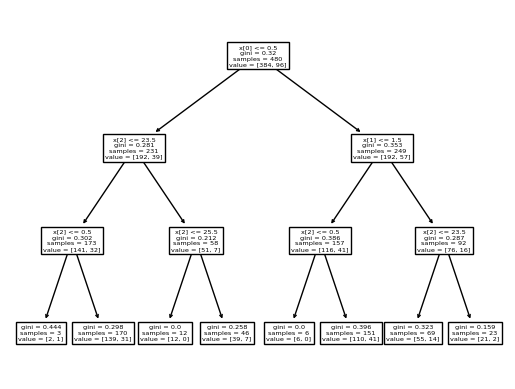

In [ ]:
import sklearn.tree as tree
tree.plot_tree(model_gini);

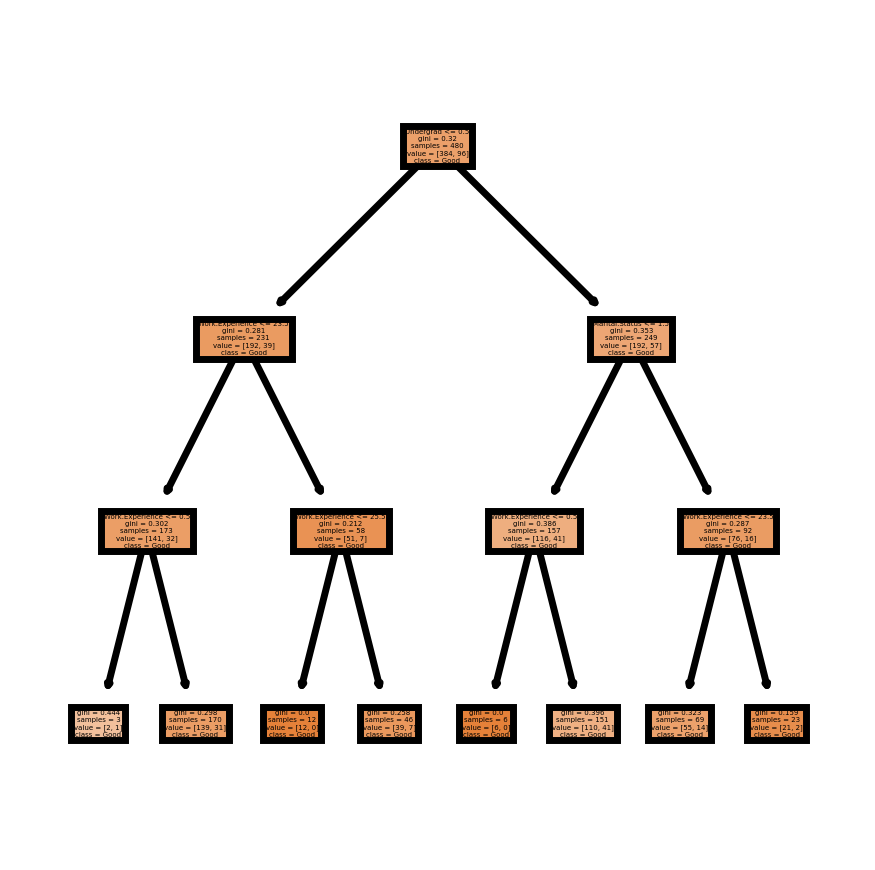

In [ ]:
# Decision tree
import matplotlib.pyplot as plt
import sklearn.tree as tree
fn=['Undergrad', 'Marital.Status', 'Work.Experience', 'Urban'] #.columns
cn=['Good', 'Risky']    #.value_count.keys
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=500)
tree.plot_tree(model_gini,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [ ]:
# Predicting on test data
y_pred_gini = model_gini.predict(x_test)
pd.Series(y_pred_gini).value_counts()

0    120
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

TaxableIncomeCategory
0    92
1    28
Name: count, dtype: int64

In [ ]:
# Accuracy
accuracy_score(y_test, y_pred_gini)

0.7666666666666667

In [ ]:
np.mean(y_pred_gini == y_test)

0.7666666666666667